In [1]:
import numpy as np
import random
import maze # https://github.com/johnsliao/python-maze-generator.git
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
class MyMaze(maze.Maze):
    def __init__(self,h,w,seed):
        random.seed(seed)
        super().__init__(h,w)

def generate_single_maze(random_state,l=9):
    m = MyMaze(l,l,random_state)
    m.generate()
    return m

def maze_formatting(m,seed,l=9):
    cell_array = np.ones((2*l+1,2*l+1))
    for i in range(2*l+1):
        for j in range(2*l+1):
            if (i==0 or j==0 or i==2*l or j==2*l):
                cell_array[i][j]=0
    for i in range(l):
        for j in range(l):
            if (m.cells[i][j].east):
                cell_array[2*j+1-1][2*i+1+1] = 0
                cell_array[2*j+1+0][2*i+1+1] = 0
                cell_array[2*j+1+1][2*i+1+1] = 0
            if (m.cells[i][j].west):
                cell_array[2*j+1-1][2*i+1-1] = 0
                cell_array[2*j+1+0][2*i+1-1] = 0
                cell_array[2*j+1+1][2*i+1-1] = 0
            if (m.cells[i][j].north):
                cell_array[2*j+1-1][2*i+1+1] = 0
                cell_array[2*j+1-1][2*i+1+0] = 0
                cell_array[2*j+1-1][2*i+1-1] = 0
            if (m.cells[i][j].south):
                cell_array[2*j+1+1][2*i+1+1] = 0
                cell_array[2*j+1+1][2*i+1+0] = 0
                cell_array[2*j+1+1][2*i+1-1] = 0
    
    random.seed(seed)
    n_trap = random.randint(0,8)
    n_hostage = random.randint(0,4)
    # print('n_hostage: ',n_hostage)
    # print('n_trap: ',n_trap)

    for i in range(n_trap):
        while True:
            idx = random.randint(0,2*l)
            idy = random.randint(0,2*l)
            if ((idx,idy) != (1,1)) and ((idx,idy) != (2*l-1,2*l-1)): # not at start/end point
                if cell_array[idx,idy] == 1: # if path
                    bot = int(cell_array[idx+1,idy]==0)
                    top = int(cell_array[idx-1,idy]==0)
                    left = int(cell_array[idx,idy-1]==0)
                    right = int(cell_array[idx,idy+1]==0)
                    if bot + top + left + right != 3: # not end path
                        if bot + top + left + right == 2: # two wall
                            bot = int(cell_array[idx+1,idy]==2)
                            top = int(cell_array[idx-1,idy]==2)
                            left = int(cell_array[idx,idy-1]==2)
                            right = int(cell_array[idx,idy+1]==2)
                            if bot + top + left + right < 1: # no continuous trap
                                cell_array[idx,idy] = 2
                                break

    for i in range(n_hostage):
        while True:
            idx = random.randint(0,2*l)
            idy = random.randint(0,2*l)
            if ((idx,idy) != (1,1)) and ((idx,idy) != (2*l-1,2*l-1)): # not at start/end point
                if cell_array[idx,idy] == 1: # if path
                    bot = int(cell_array[idx+1,idy]==0)
                    top = int(cell_array[idx-1,idy]==0)
                    left = int(cell_array[idx,idy-1]==0)
                    right = int(cell_array[idx,idy+1]==0)
                    if bot + top + left + right == 3: # end path
                        cell_array[idx,idy] = 3
                        break
                        
    single_bit = ['0','1']
    excess_3_list = ['0011','0100','0101','0110','0111','1000','1001','1010','1011','1100']
    if (n_hostage==2 or n_hostage==4):
        password_list = [random.choice(single_bit) + \
                         random.choice(excess_3_list) + \
                         random.choice(excess_3_list) for i in range(n_hostage)]
    else:
        password_list = [''.join([random.choice(single_bit) for i in range(9)]) for j in range(n_hostage)]
    
    return cell_array, password_list

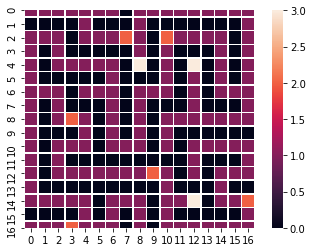

In [25]:
# Single maze
seed = 0
m = generate_single_maze(seed)
# m.draw()
cell_array,pwd_list = maze_formatting(m,seed)
sns.heatmap(cell_array[1:-1,1:-1].astype(int),linewidth=0.5,square=True)

In [22]:
n_pattern = 500
with open('input.txt','w') as f:
    # f.write(str(n_pattern) + '\n')
    # f.write('\n')
    for seed in range(n_pattern):
        m = generate_single_maze(seed)
        cell_array,pwd_list = maze_formatting(m,seed)
        f.write(' '.join(cell_array[1:-1,1:-1].reshape(-1).astype(int).astype(str).tolist()) + '\n')
        # f.write(' '.join([str(int(i,2)) for i in pwd_list]) + '\n')
        f.write('\n')